In [1]:
%pip install ultralytics==8.2.0

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5643.4/8062.4 GB disk)


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    

Download dataset segmentasi dari roboflow

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="KUfzSbS1kChzATiSrQnr")
project = rf.workspace("testing-kyarp").project("car_segmentasi")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to car_segmentasi-1 in yolov8:: 100%|██████████| 174/174 [00:00<00:00, 8496.72it/s]


In [4]:
!ls

__notebook__.ipynb  car_segmentasi-1


In [5]:
print("==train===")
!ls /kaggle/working/car_segmentasi-1/train

print("==valid===")
!ls /kaggle/working/car_segmentasi-1/valid

print("==test===")
!ls /kaggle/working/car_segmentasi-1/test

==train===
images	labels
==valid===
images	labels
==test===
images	labels


In [6]:
!ls /kaggle/working/car_segmentasi-1/train/images

1161_jpg.rf.3dcb7836dd384104922f0fcb75d68036.jpg
1161_jpg.rf.a9ae50e4eb11b2485594f433bbb7bd1f.jpg
1161_jpg.rf.b4d3042dfb2c1423fdf494e934301a2e.jpg
1269_jpg.rf.1f5afd114e148f49fede7694b4640950.jpg
1269_jpg.rf.37c0dce9e905f44b2df3ba68cdbd2bd7.jpg
1269_jpg.rf.a9632646c205bce1954ca375d6c0192c.jpg
1400_jpg.rf.5a3ad2d47c6a4e8af1da1042beab1f5c.jpg
1400_jpg.rf.73a4308e086b7547264a85983cd6b43c.jpg
1400_jpg.rf.b1dd3b680ef3937da2ee2500b7195d74.jpg
15_jpg.rf.60428e345feee88235c83bb8d1353e1f.jpg
15_jpg.rf.ddbb4bf4e7d3c9df20983f41ef3f9551.jpg
15_jpg.rf.dfc3e17a4677e5d1c5bd25f4dd427c5b.jpg
162_jpg.rf.0acf9a2d2c4fb555b7d6ddd3f007abda.jpg
162_jpg.rf.ce310d6d44a7418ee2a27564737c56fd.jpg
162_jpg.rf.f4b4290220ebd4f58e81d7d16340f6f4.jpg
1651_jpg.rf.250dba133c5b50afb916655f4900bf8f.jpg
1651_jpg.rf.9e6f6f39d04f63085b5348c80521ae8d.jpg
1651_jpg.rf.a30fe3299877c3de9e877d70fc1a93be.jpg
177_jpg.rf.46011488d8517f674427f97b71dcc25b.jpg
177_jpg.rf.4bc465c95d6894b8d57eaf834ee20eba.jpg
177_jpg.rf.5a355549b99370cf7828

In [7]:

from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
ROOT_PATH = "/kaggle/working/car_segmentasi-1"

In [9]:
!ls

__notebook__.ipynb  car_segmentasi-1


buat file data.yaml untuk mengarahkan model yolo ke lokasi dataset

In [10]:
!cat /kaggle/input/datayaml2/data.yaml

train model yolo dengan CLI

In [11]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/kaggle/input/datayaml2/data.yaml epochs=30 imgsz=320 save=true

100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 256MB/s]
New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/kaggle/input/datayaml2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, au

In [12]:

!ls /kaggle/working/runs/segment/train

BoxF1_curve.png					  labels_correlogram.jpg
BoxPR_curve.png					  results.csv
BoxP_curve.png					  results.png
BoxR_curve.png					  train_batch0.jpg
MaskF1_curve.png				  train_batch1.jpg
MaskPR_curve.png				  train_batch100.jpg
MaskP_curve.png					  train_batch101.jpg
MaskR_curve.png					  train_batch102.jpg
args.yaml					  train_batch2.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1717316274.eb4cae7d6b33.76.0  weights
labels.jpg


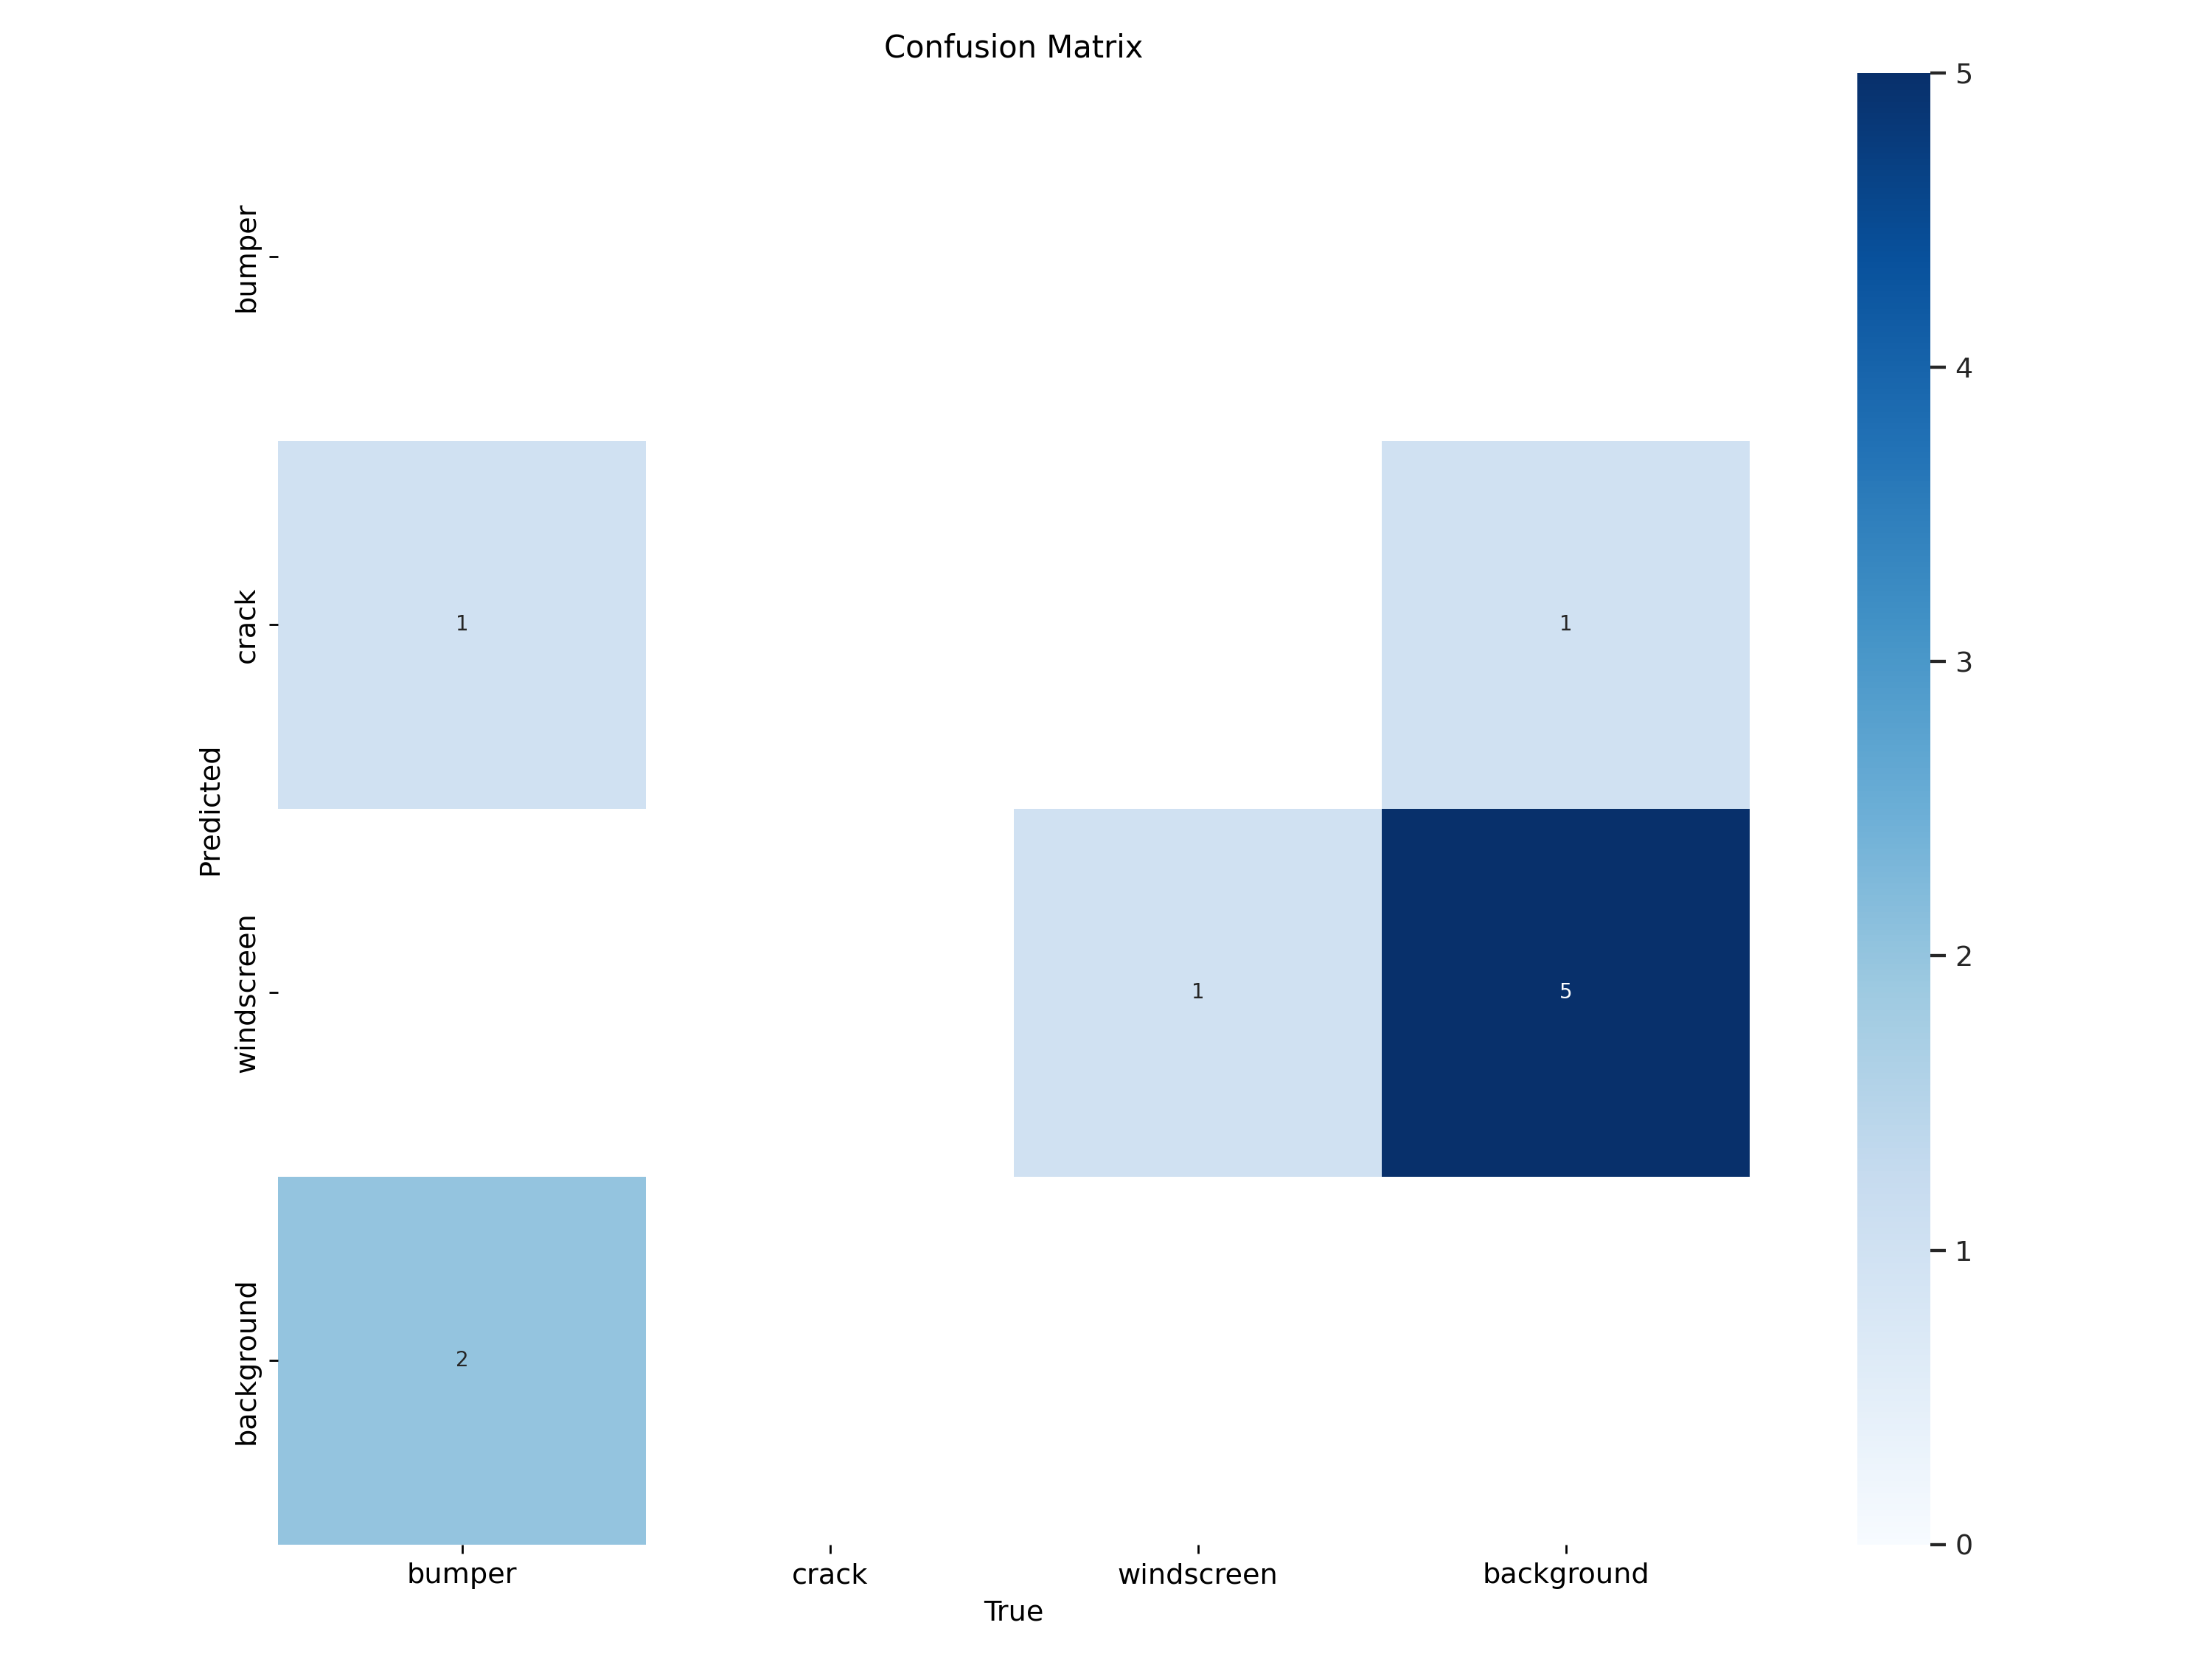

In [13]:
Image(filename=f'/kaggle/working/runs/segment/train/confusion_matrix.png', width=600)

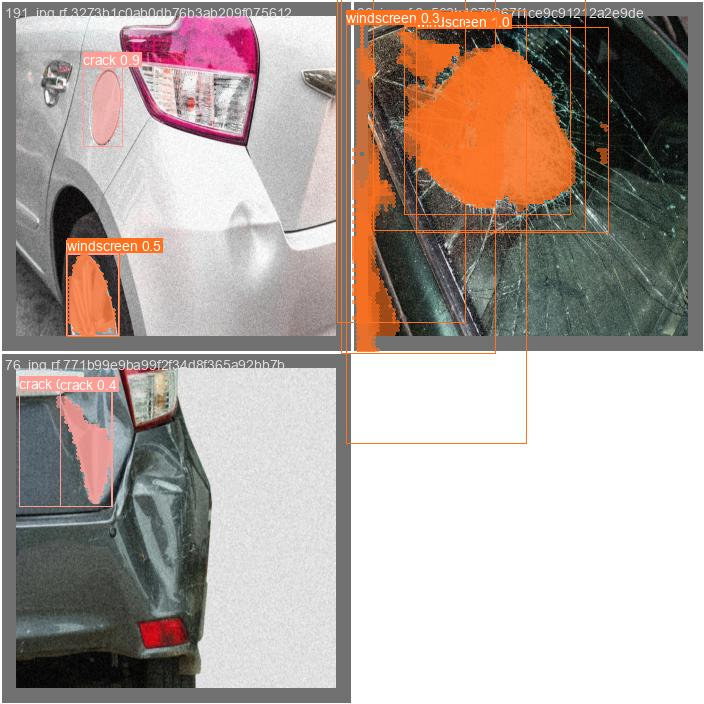

In [14]:
Image(filename=f'/kaggle/working/runs/segment/train/val_batch0_pred.jpg', width=600)

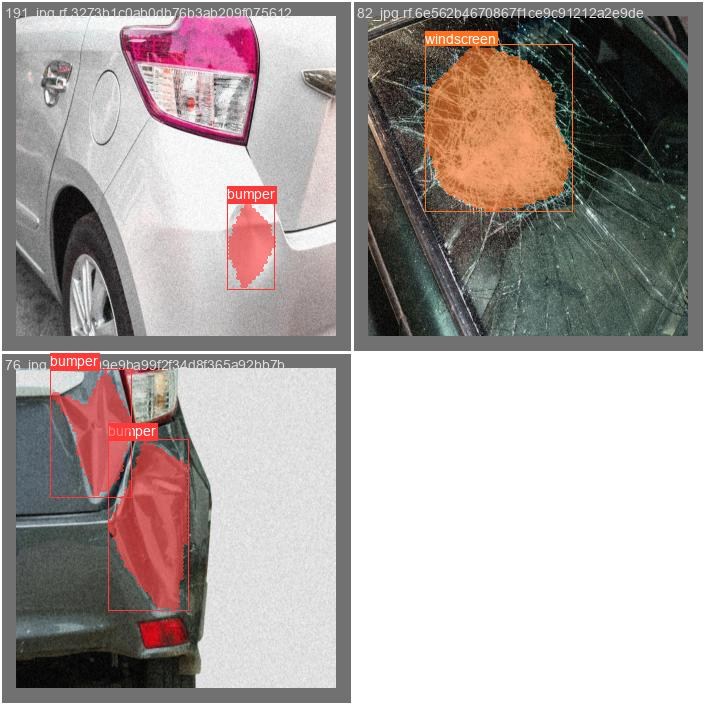

In [15]:
Image(filename=f'/kaggle/working/runs/segment/train/val_batch0_labels.jpg', width=600)

In [16]:
#weights 
# /kaggle/working/runs/segment/train/weights/best.pt

In [17]:
!yolo task=segment mode=val model= /kaggle/working/runs/segment/train/weights/best.pt data= /kaggle/input/datayaml2/data.yaml

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /kaggle/working/car_segmentasi-1/valid/labels.cache... 3 images, 0
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          3          4      0.749        0.5      0.501      0.299      0.749        0.5      0.497      0.373
                bumper          3          3          1          0    0.00731     0.0013          1          0          0          0
            windscreen          3          1      0.499          1      0.995      0.597      0.499          1      0.995      0.746
Speed: 1.1ms preprocess, 29.0ms inference, 0.0ms loss, 335.6ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [18]:

!yolo task=segment mode=predict model=/kaggle/working/runs/segment/train/weights/best.pt conf=0.25 source=/kaggle/working/car_segmentasi-1/train/images save=true

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/77 /kaggle/working/car_segmentasi-1/train/images/1161_jpg.rf.3dcb7836dd384104922f0fcb75d68036.jpg: 320x320 1 windscreen, 8.4ms
image 2/77 /kaggle/working/car_segmentasi-1/train/images/1161_jpg.rf.a9ae50e4eb11b2485594f433bbb7bd1f.jpg: 320x320 2 windscreens, 8.2ms
image 3/77 /kaggle/working/car_segmentasi-1/train/images/1161_jpg.rf.b4d3042dfb2c1423fdf494e934301a2e.jpg: 320x320 1 crack, 2 windscreens, 7.1ms
image 4/77 /kaggle/working/car_segmentasi-1/train/images/1269_jpg.rf.1f5afd114e148f49fede7694b4640950.jpg: 320x320 1 windscreen, 6.9ms
image 5/77 /kaggle/working/car_segmentasi-1/train/images/1269_jpg.rf.37c0dce9e905f44b2df3ba68cdbd2bd7.jpg: 320x320 1 crack, 1 windscreen, 6.8ms
image 6/77 /kaggle/working/car_segmentasi-1/train/images/1269_jpg.rf.a9632646c205bce1954ca375d6c0192c.jpg: 320x320 2 windscre

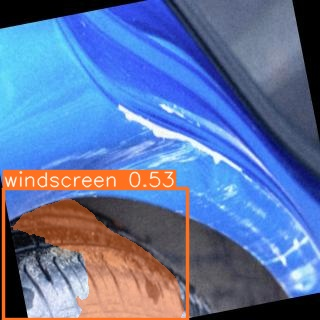

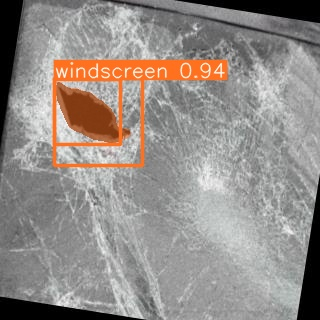

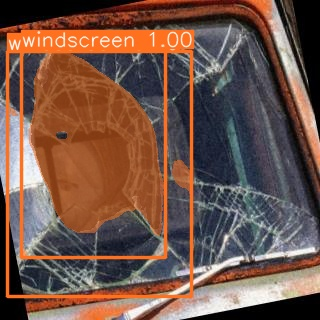

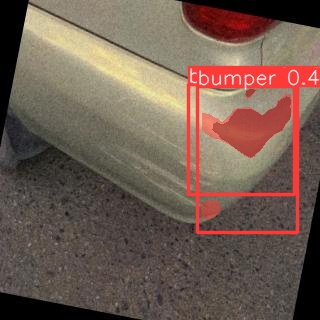

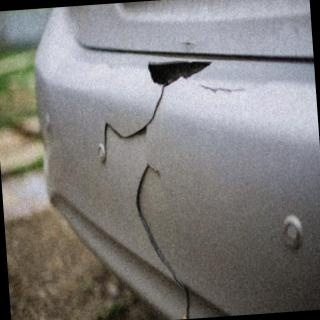

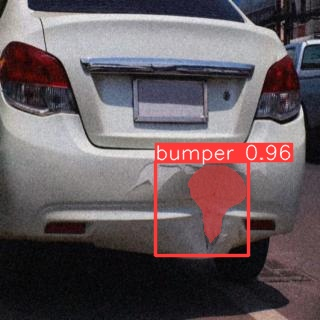

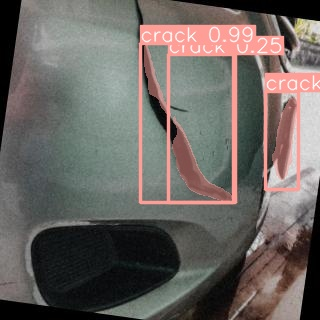

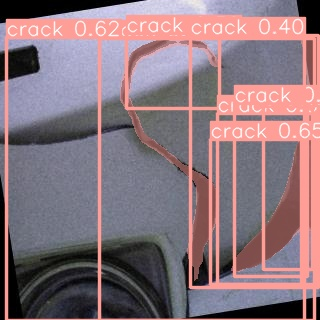

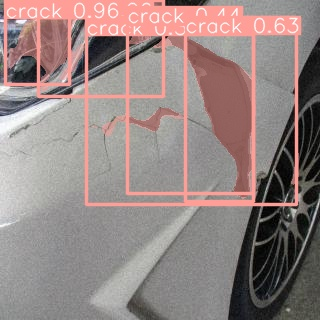

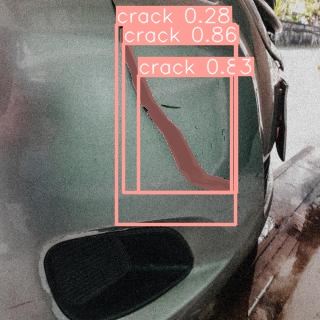

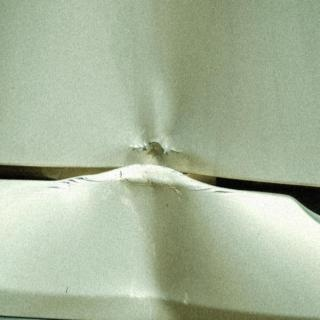

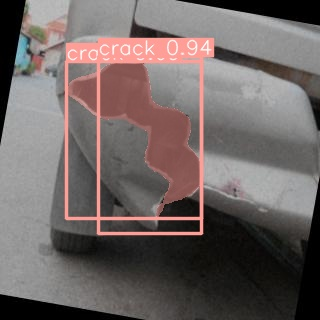

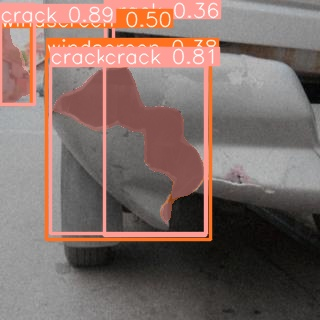

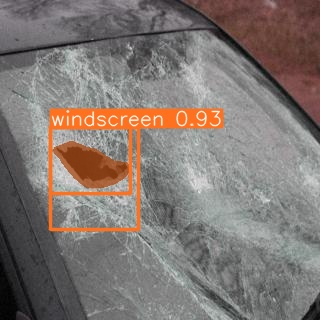

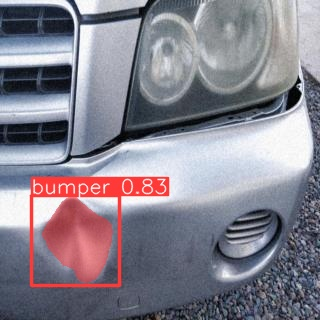

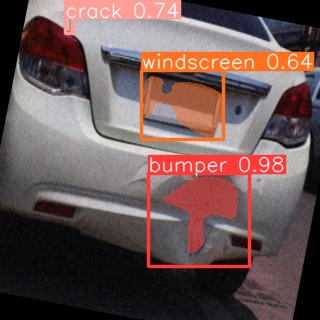

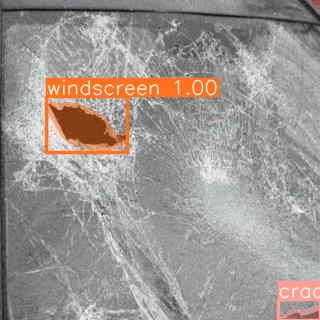

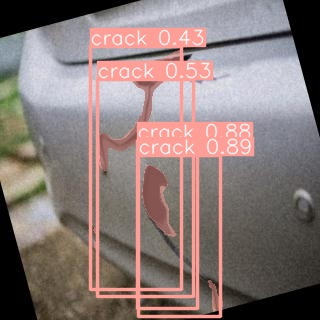

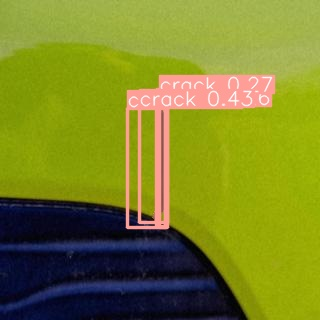

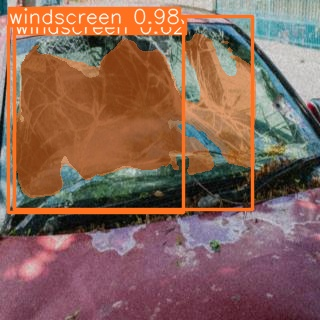

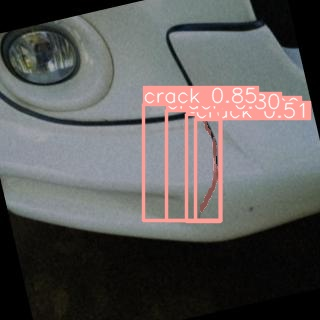

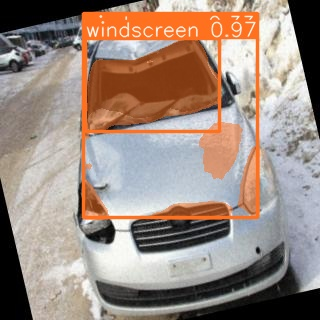

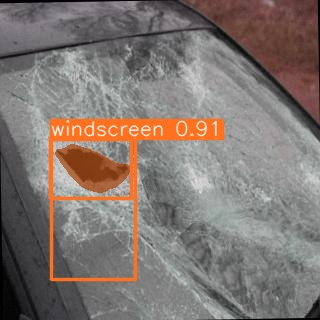

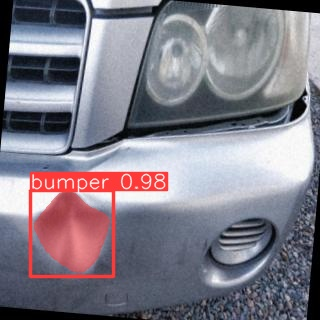

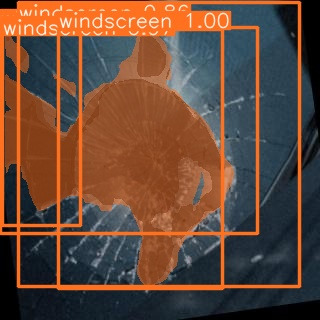

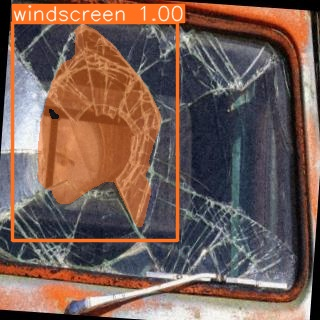

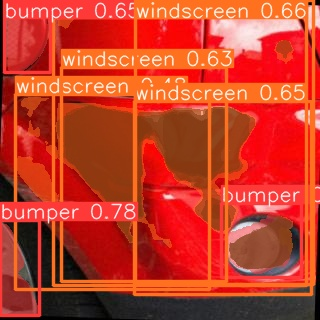

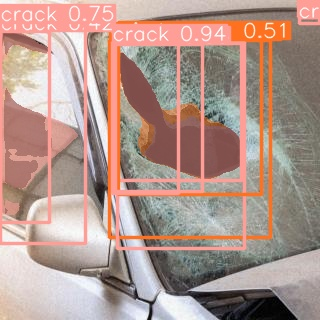

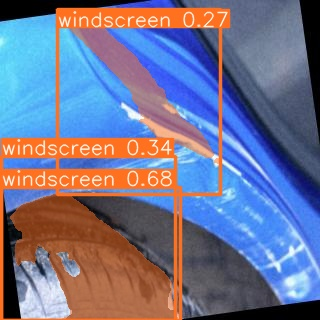

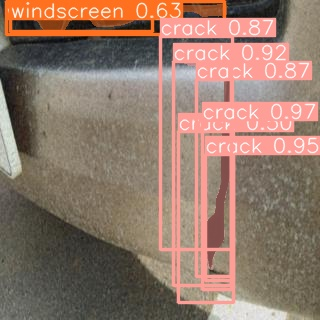

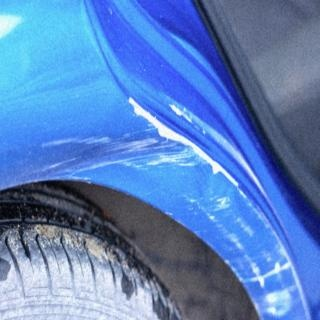

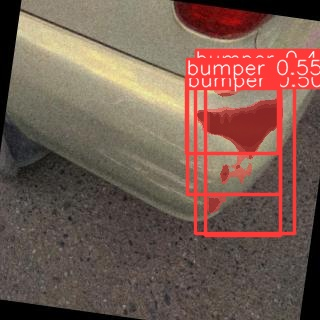

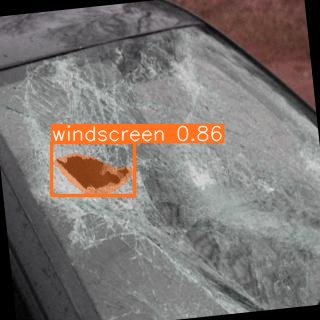

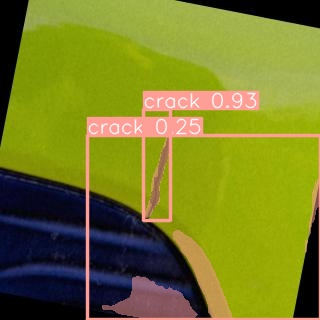

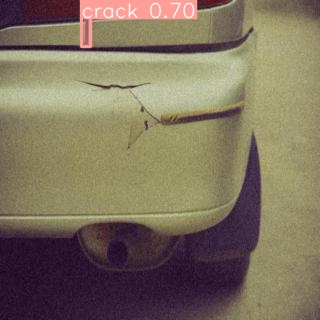

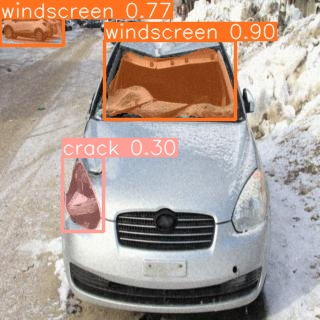

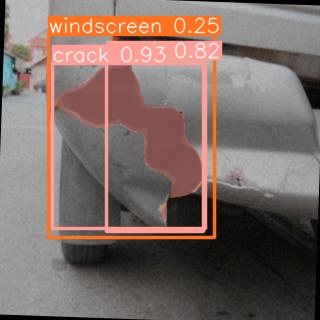

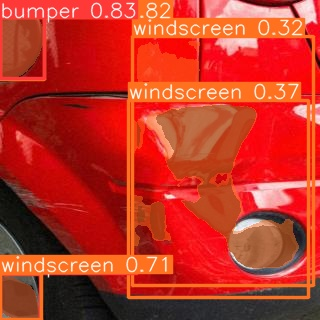

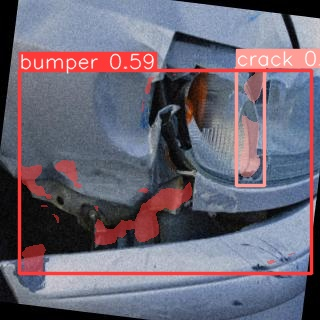

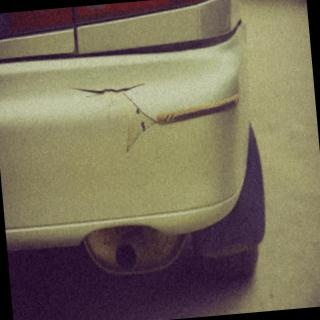

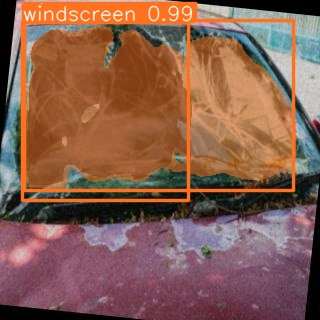

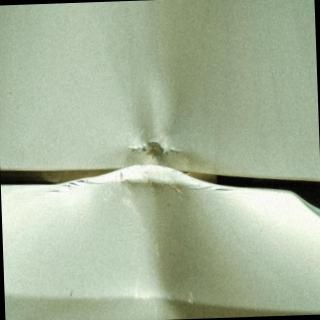

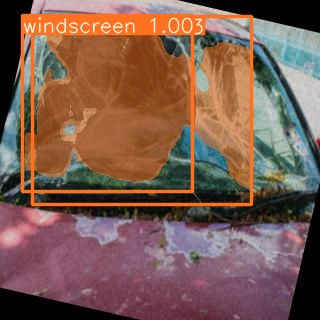

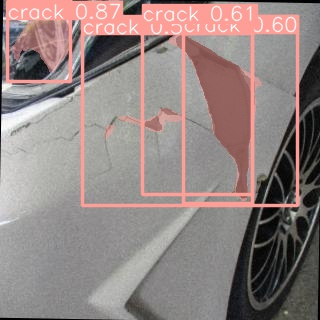

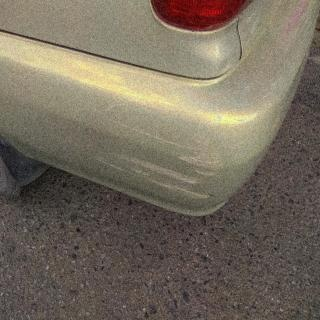

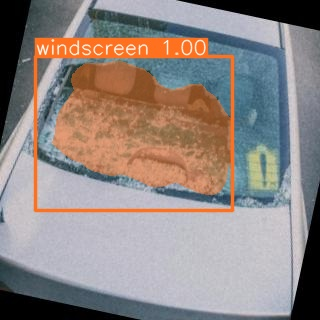

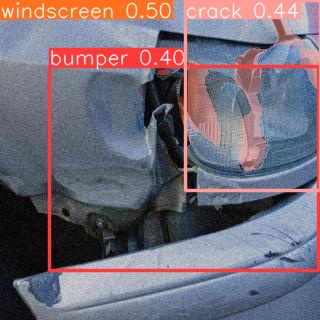

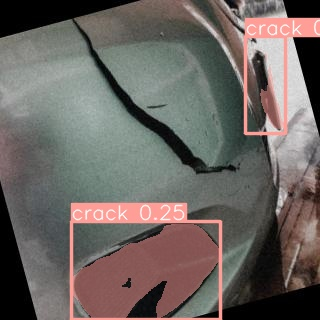

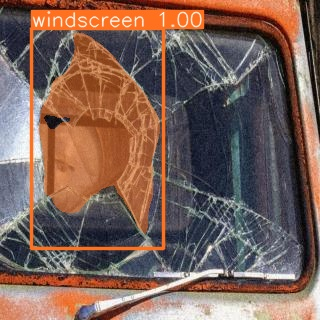

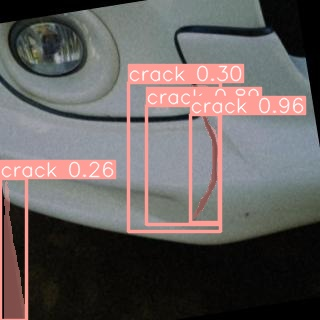

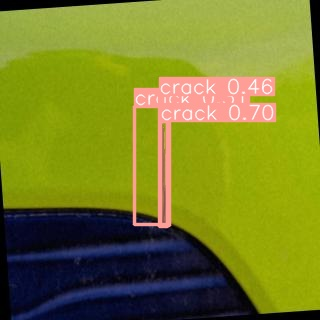

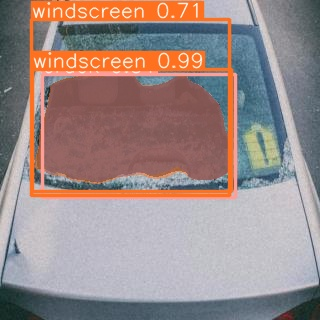

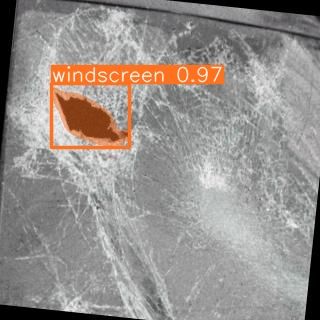

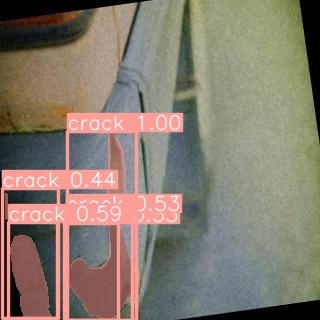

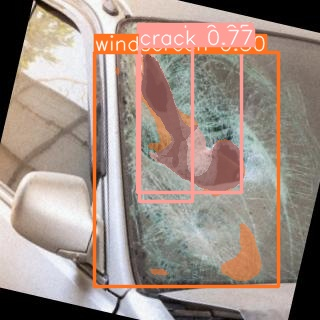

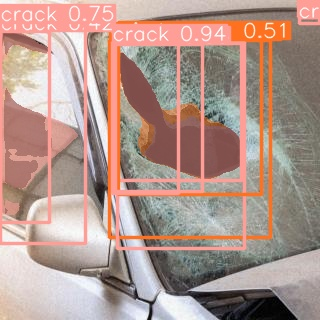

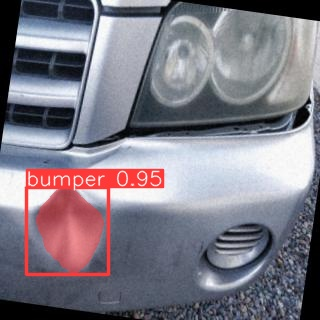

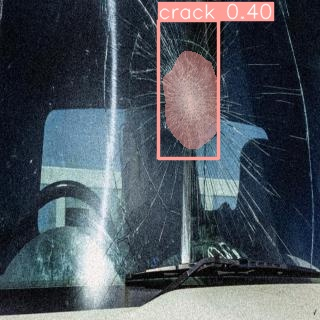

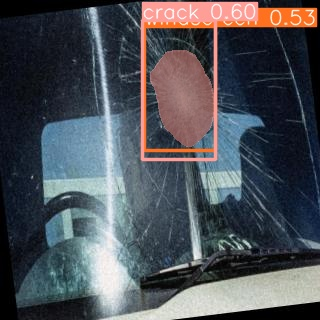

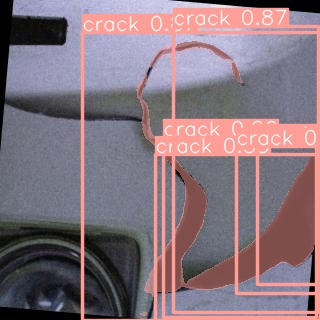

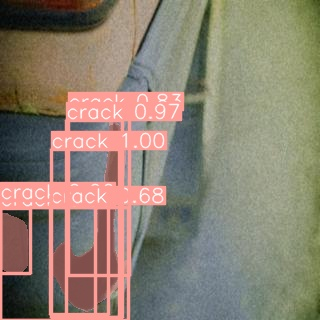

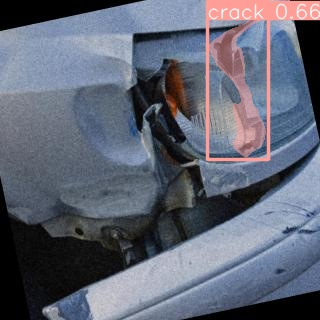

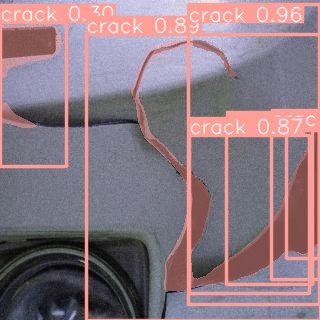

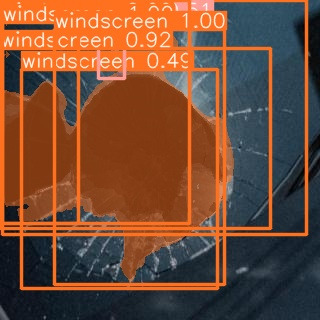

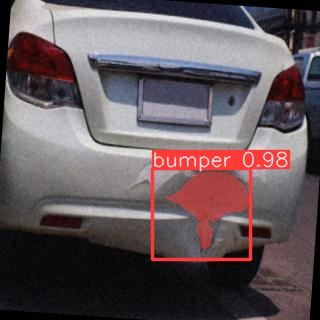

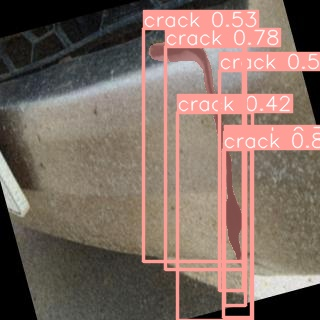

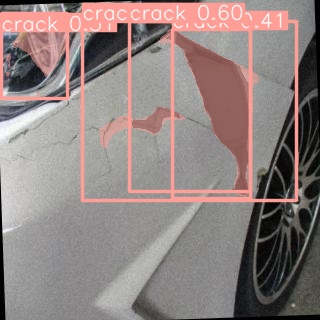

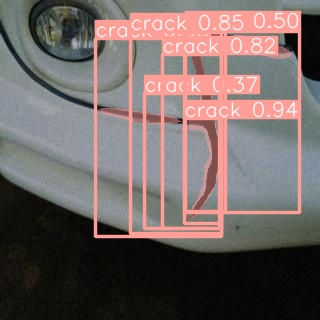

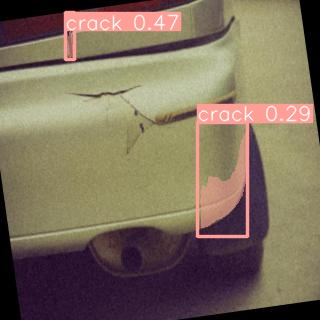

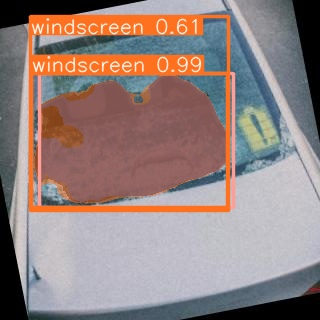

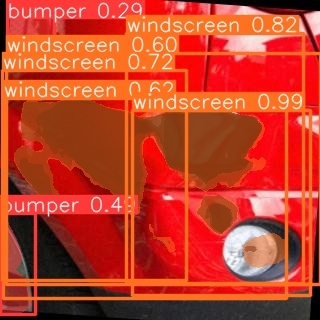

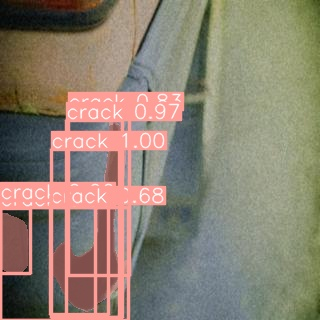

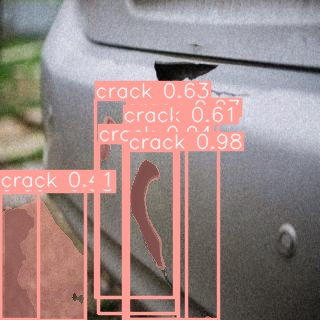

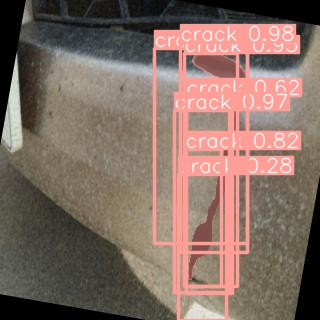

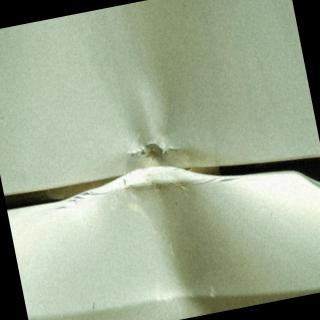

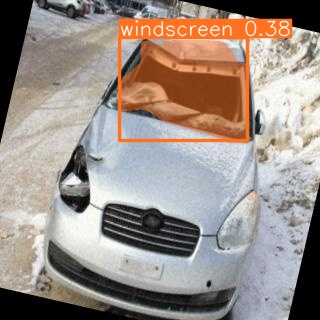

In [19]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/segment/predict/*.jpg')[:-1]:
      display(Image(filename=image_path, height=600))
      print("\n")
     

In [20]:

!yolo task=segment mode=predict model=/kaggle/working/runs/segment/train/weights/best.pt conf=0.25 source=/kaggle/input/bumper-dent-test save=true

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /kaggle/input/bumper-dent-test/120.jpg: 256x320 (no detections), 79.5ms
image 2/2 /kaggle/input/bumper-dent-test/126.jpg: 256x320 (no detections), 8.7ms
Speed: 2.2ms preprocess, 44.1ms inference, 340.1ms postprocess per image at shape (1, 3, 256, 320)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


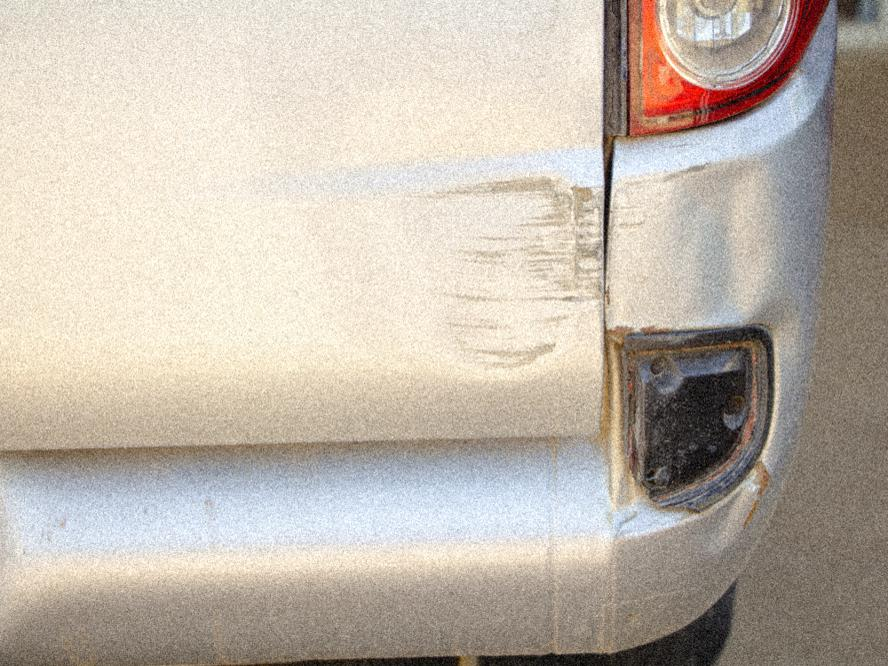

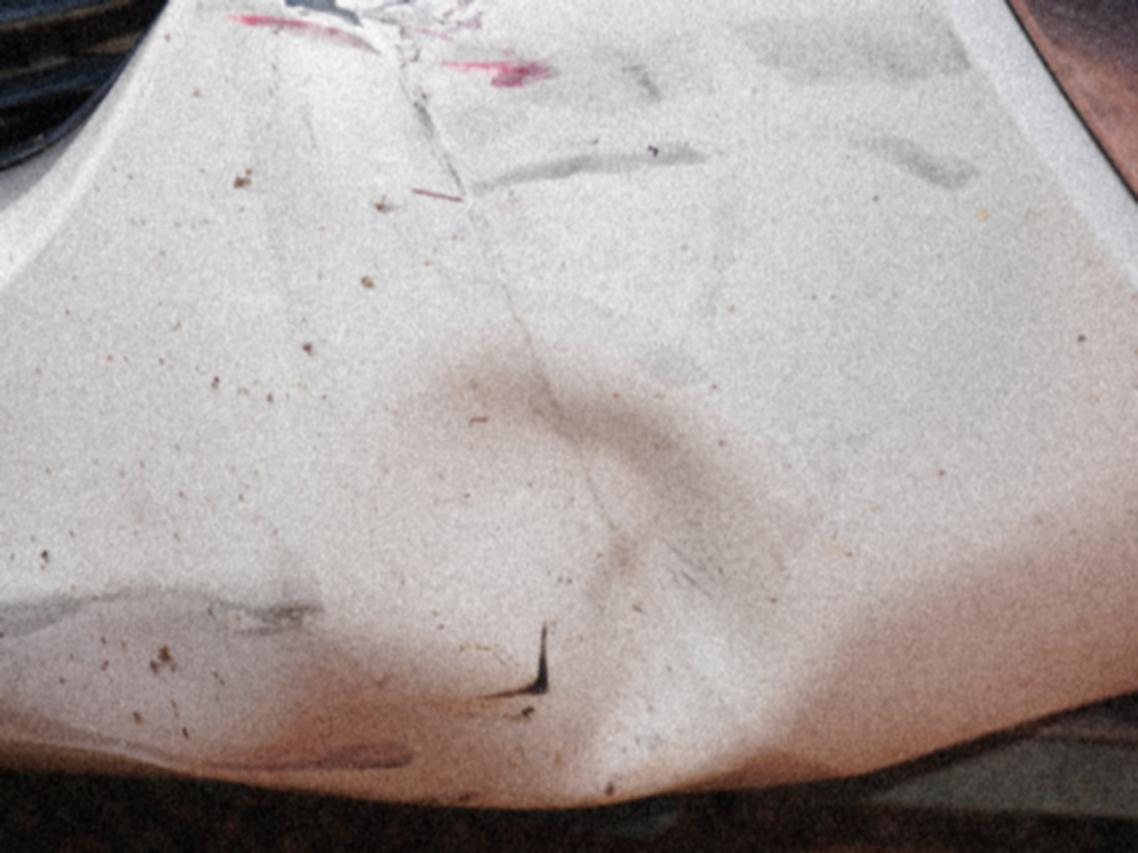

In [21]:
for image_path in glob.glob(f'/kaggle/input/bumper-dent-test/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")
     

In [22]:
model = YOLO(f'/kaggle/working/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 104k/104k [00:00<00:00, 430kB/s] 


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 99.2ms
Speed: 3.7ms preprocess, 99.2ms inference, 1371.5ms postprocess per image at shape (1, 3, 640, 384)


In [23]:
print(f'{results}')

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chai

Train model yolo dengan kode python

In [24]:
model = YOLO("/kaggle/working/yolov8s-seg.pt")  # pass any model type
hasil = model.train(data="/kaggle/input/datayaml2/data.yaml", epochs=100, imgsz = 320, task='segment')
# hasil_= model.train(data="/kaggle/input/datayaml2/data.yaml", epochs=100, imgsz=320)

New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/working/yolov8s-seg.pt, data=/kaggle/input/datayaml2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

2024-06-02 08:20:03,406	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-02 08:20:03,974	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-02 08:20:04.521525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 08:20:04.521579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 08:20:04.523088: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLA

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /kaggle/working/car_segmentasi-1/train/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/car_segmentasi-1/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.72G      2.161      4.899      4.046      1.934         24        320: 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]

                   all          3          4    0.00246      0.667     0.0082    0.00447    0.00246      0.667    0.00609     0.0038



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.66G      2.078      4.736      3.599      1.927         35        320: 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.35it/s]

                   all          3          4      0.874        0.5      0.502        0.3      0.874        0.5      0.497      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.71G      1.692      3.455      2.986      1.654         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.53it/s]

                   all          3          4      0.733        0.5      0.249      0.149      0.733        0.5      0.249      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.72G      1.567      2.851      2.363      1.543         33        320: 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.14it/s]

                   all          3          4      0.909        0.5      0.545      0.368      0.909        0.5      0.501      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.71G       1.39      2.759      2.133      1.453         22        320: 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all          3          4       0.48      0.667      0.715      0.295      0.677        0.5      0.503      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.72G      1.269      2.552      1.761      1.341         26        320: 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.28it/s]

                   all          3          4      0.965        0.5      0.504      0.302      0.965        0.5      0.497      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.72G      1.375      2.358      1.807      1.316         27        320: 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.11it/s]

                   all          3          4      0.796        0.5      0.532      0.401      0.796        0.5      0.497      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.72G      1.321      2.429      1.664      1.295         36        320: 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.77it/s]

                   all          3          4      0.598        0.5       0.19     0.0211     0.0016        0.5    0.00655   0.000655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.73G      1.356      2.295      1.696      1.307         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.90it/s]

                   all          3          4      0.583        0.5       0.26     0.0549          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.71G      1.318      2.246      1.526       1.27         22        320: 100%|██████████| 5/5 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all          3          4    0.00466      0.833     0.0227     0.0101    0.00151        0.5    0.00957    0.00287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.74G      1.279      2.319      1.436      1.262         31        320: 100%|██████████| 5/5 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.26it/s]

                   all          3          4    0.00634      0.833     0.0122    0.00587    0.00246      0.167    0.00424   0.000755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.71G      1.264       2.22       1.47      1.305         39        320: 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.16it/s]

                   all          3          4    0.00647      0.833     0.0145    0.00647    0.00256        0.5    0.00732    0.00121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.72G      1.326       2.26      1.474       1.33         27        320: 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.10it/s]

                   all          3          4    0.00623      0.833     0.0241    0.00866    0.00457      0.667     0.0215    0.00433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.71G      1.161      2.051      1.245      1.248         29        320: 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.01it/s]

                   all          3          4     0.0136      0.833      0.129     0.0137          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100       1.7G      1.368      2.326      1.435      1.316         28        320: 100%|██████████| 5/5 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.32it/s]

                   all          3          4     0.0062      0.667     0.0641      0.019          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.72G      1.315      2.091      1.539       1.31         35        320: 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.67it/s]

                   all          3          4       0.94        0.5      0.497     0.0746    0.00498      0.667     0.0847     0.0251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.52G      1.324      2.203       1.44      1.359         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

                   all          3          4    0.00357        0.5     0.0332     0.0172    0.00357        0.5     0.0332     0.0073



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.75G      1.401      2.154      1.502      1.371         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.48it/s]

                   all          3          4    0.00311        0.5     0.0226    0.00546    0.00311        0.5    0.00939   0.000939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.65G      1.346      2.008      1.495      1.328         29        320: 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]

                   all          3          4      0.583        0.5      0.085     0.0192      0.521        0.5     0.0216    0.00216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.63G      1.469       2.22        1.6      1.374         36        320: 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.76it/s]

                   all          3          4      0.574        0.5      0.124     0.0428      0.544        0.5     0.0553     0.0111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.73G      1.337      2.117      1.478      1.324         26        320: 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.46it/s]

                   all          3          4     0.0179        0.5     0.0355     0.0142    0.00472        0.5     0.0311    0.00933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.72G      1.252      1.993      1.369      1.326         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.85it/s]

                   all          3          4     0.0973        0.5      0.124     0.0237     0.0973        0.5      0.124     0.0187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.74G        1.2      1.987      1.377       1.25         33        320: 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.86it/s]

                   all          3          4      0.806        0.5      0.502     0.0596      0.806        0.5      0.497      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.62G       1.29      2.076      1.417      1.322         17        320: 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]

                   all          3          4      0.742        0.5      0.258       0.13      0.742        0.5      0.249     0.0772



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.72G      1.352      2.188      1.487      1.382         22        320: 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.48it/s]

                   all          3          4     0.0098        0.5     0.0995     0.0348     0.0098        0.5     0.0134    0.00538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.72G      1.303      2.031      1.349      1.332         29        320: 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.31it/s]

                   all          3          4     0.0114        0.5      0.166     0.0608     0.0114        0.5     0.0553     0.0076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.63G      1.243      2.031      1.308      1.288         27        320: 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.54it/s]

                   all          3          4      0.162        0.5      0.255        0.1          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.75G      1.196      1.847      1.232      1.258         18        320: 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.36it/s]

                   all          3          4      0.979        0.5      0.501        0.2          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.72G      1.205      2.034      1.193      1.248         36        320: 100%|██████████| 5/5 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.96it/s]

                   all          3          4      0.943        0.5      0.497      0.149      0.943        0.5      0.497     0.0995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.72G      1.271       1.83      1.165      1.266         33        320: 100%|██████████| 5/5 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.08it/s]

                   all          3          4      0.656        0.5      0.166     0.0724     0.0114        0.5     0.0498     0.0199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.74G      1.146      1.925      1.154      1.216         31        320: 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.65it/s]

                   all          3          4      0.593        0.5     0.0995     0.0597      0.593        0.5     0.0995     0.0298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.73G      1.302       2.01      1.282      1.267         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.16it/s]

                   all          3          4     0.0181        0.5     0.0207     0.0187     0.0181        0.5     0.0207     0.0104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.73G      1.205      1.877      1.127      1.252         29        320: 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.09it/s]

                   all          3          4      0.543        0.5     0.0736     0.0326     0.0367      0.667      0.056     0.0206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.73G      1.171      1.722      1.095      1.232         23        320: 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.45it/s]

                   all          3          4      0.535        0.5     0.0846     0.0295      0.528        0.5     0.0641     0.0123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.73G      1.084      1.722      1.063      1.188         31        320: 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.23it/s]

                   all          3          4      0.545        0.5     0.0711     0.0213     0.0167        0.5     0.0178    0.00178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       1.7G      1.092      1.794      1.049      1.195         27        320: 100%|██████████| 5/5 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.47it/s]

                   all          3          4       0.64        0.5      0.166     0.0205       0.01        0.5     0.0131    0.00131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.73G      1.232      1.842      1.197      1.249         39        320: 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.13it/s]

                   all          3          4      0.648        0.5      0.166     0.0422     0.0348        0.5     0.0452    0.00452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.72G      1.062      1.764      1.078      1.165         37        320: 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.29it/s]

                   all          3          4      0.948        0.5      0.506      0.159      0.948        0.5      0.516      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.74G      1.255      1.939       1.04      1.229         27        320: 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.73it/s]

                   all          3          4      0.969        0.5      0.504      0.155      0.969        0.5      0.516      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.75G      1.307      1.997      1.207      1.328         23        320: 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.41it/s]

                   all          3          4     0.0807        0.5      0.124     0.0746     0.0807        0.5      0.137     0.0386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.73G      1.166      1.717      1.012      1.187         38        320: 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.31it/s]

                   all          3          4     0.0973      0.487     0.0995     0.0441     0.0973      0.487       0.11     0.0408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.72G      1.208      1.684      1.068      1.212         23        320: 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.80it/s]

                   all          3          4     0.0487        0.5     0.0693     0.0289     0.0487        0.5     0.0693     0.0256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.76G      1.218      1.713      1.112      1.237         32        320: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.88it/s]

                   all          3          4     0.0951        0.5      0.133     0.0472     0.0951        0.5      0.124     0.0476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.74G      1.185       1.69      1.074      1.178         26        320: 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.22it/s]

                   all          3          4      0.441        0.5      0.535      0.308      0.441        0.5      0.503      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.72G       1.12       1.86      1.016      1.177         34        320: 100%|██████████| 5/5 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.81it/s]

                   all          3          4      0.955        0.5      0.524      0.312      0.955        0.5      0.588      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.71G      1.077      1.638     0.9518      1.142         26        320: 100%|██████████| 5/5 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.39it/s]

                   all          3          4       0.46      0.667      0.607      0.365       0.46      0.667      0.607      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.72G     0.9963      1.585     0.9653      1.103         21        320: 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.78it/s]

                   all          3          4      0.807      0.773      0.833      0.395      0.852      0.667      0.668      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.73G      1.004      1.479     0.9068      1.101         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.19it/s]

                   all          3          4      0.656      0.681      0.834      0.392      0.656      0.681      0.834      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.71G      1.058      1.656     0.9805      1.132         34        320: 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.48it/s]

                   all          3          4      0.523      0.667      0.442      0.166      0.523      0.667      0.442      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.72G      1.127      1.526     0.9181      1.206         30        320: 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.35it/s]

                   all          3          4       0.75        0.5      0.249     0.0604      0.965        0.5      0.587      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.75G      1.001        1.5     0.8587      1.102         23        320: 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.10it/s]

                   all          3          4      0.619        0.5       0.14      0.042      0.902        0.5      0.497     0.0933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.74G     0.9924      1.503      0.849      1.116         38        320: 100%|██████████| 5/5 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          3          4      0.659        0.5      0.166     0.0829      0.659        0.5      0.182     0.0879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.73G     0.9465      1.438     0.7743      1.085         26        320: 100%|██████████| 5/5 [00:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.92it/s]

                   all          3          4      0.657       0.47      0.166     0.0995      0.657       0.47       0.18     0.0873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.72G     0.9588      1.417     0.8621      1.108         31        320: 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.67it/s]

                   all          3          4      0.621      0.483      0.124     0.0746      0.621      0.483      0.124     0.0498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.73G      0.953       1.63     0.8314      1.137         24        320: 100%|██████████| 5/5 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]

                   all          3          4      0.975        0.5      0.497      0.166      0.157        0.5      0.166      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.72G     0.9211      1.453     0.8107      1.101         35        320: 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.39it/s]

                   all          3          4      0.983        0.5      0.497      0.109     0.0333        0.5     0.0995     0.0361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.73G     0.9387      1.517     0.8009      1.082         29        320: 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.43it/s]

                   all          3          4      0.972        0.5      0.497     0.0719     0.0333        0.5     0.0553     0.0221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.72G     0.9403      1.507     0.7961      1.077         31        320: 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.54it/s]

                   all          3          4     0.0278        0.5     0.0711     0.0426     0.0278        0.5     0.0711     0.0213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.76G     0.9131      1.446     0.7723      1.113         28        320: 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          3          4     0.0238        0.5     0.0711     0.0355     0.0551      0.667      0.249     0.0391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.72G     0.9349       1.36     0.7511      1.062         29        320: 100%|██████████| 5/5 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.68it/s]

                   all          3          4      0.556      0.451     0.0622     0.0373      0.157      0.667      0.244     0.0611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.73G      0.911      1.397     0.7632      1.064         30        320: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.02it/s]

                   all          3          4      0.563        0.5     0.0711     0.0497     0.0833      0.667      0.259     0.0732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.74G     0.8804      1.281     0.7494      1.085         26        320: 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.05it/s]

                   all          3          4      0.569        0.5     0.0829      0.058      0.569        0.5      0.271     0.0791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.71G     0.8736      1.229      0.696      1.081         26        320: 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.27it/s]

                   all          3          4       0.62        0.5      0.124     0.0746       0.62        0.5       0.25     0.0997



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.72G     0.8956      1.323     0.7888        1.1         32        320: 100%|██████████| 5/5 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.19it/s]

                   all          3          4      0.738        0.5      0.249     0.0995      0.738        0.5       0.44      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.73G     0.8693      1.447     0.7153      1.106         32        320: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.88it/s]

                   all          3          4      0.743        0.5      0.249      0.174      0.637      0.667      0.444      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.73G     0.8604      1.433     0.7343      1.058         35        320: 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.14it/s]

                   all          3          4      0.746        0.5      0.497      0.398      0.588      0.667      0.693      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.76G      0.969      1.351     0.7546      1.084         29        320: 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]

                   all          3          4      0.891        0.5      0.497      0.398      0.635      0.667      0.689      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.71G     0.9178      1.361     0.7632      1.115         28        320: 100%|██████████| 5/5 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.60it/s]

                   all          3          4      0.922        0.5      0.549      0.304      0.554      0.667      0.683      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.73G     0.8519      1.268     0.6475      1.042         32        320: 100%|██████████| 5/5 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.15it/s]

                   all          3          4      0.943        0.5      0.497      0.298      0.943        0.5      0.689      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.71G     0.8951      1.326     0.7474      1.065         35        320: 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.76it/s]

                   all          3          4      0.793        0.5      0.497      0.298      0.793        0.5      0.706       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.73G     0.8262      1.317      0.672      1.058         35        320: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.22it/s]

                   all          3          4     0.0556        0.5      0.249      0.124     0.0556        0.5      0.249      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.54G     0.8558      1.327     0.7132      1.076         31        320: 100%|██████████| 5/5 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.36it/s]

                   all          3          4        0.1        0.5      0.166     0.0995        0.1        0.5      0.166     0.0995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.73G     0.8747      1.269     0.6965      1.066         27        320: 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.73it/s]

                   all          3          4      0.716      0.432      0.249      0.174      0.716      0.432      0.249      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.73G     0.8272      1.206     0.6253      1.055         37        320: 100%|██████████| 5/5 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.49it/s]

                   all          3          4      0.743        0.5      0.497      0.398      0.743        0.5      0.497      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.71G     0.8173      1.176     0.6442       1.01         31        320: 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.79it/s]

                   all          3          4      0.949        0.5      0.497      0.348      0.949        0.5      0.497      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.72G     0.7853       1.09     0.6732      1.018         36        320: 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.55it/s]

                   all          3          4      0.964        0.5      0.497      0.348      0.964        0.5      0.497      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.71G     0.8289      1.204     0.6666      1.057         33        320: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          3          4      0.972        0.5      0.497      0.348      0.972        0.5      0.497      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.71G     0.8072      1.166     0.6615      1.031         30        320: 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.27it/s]

                   all          3          4      0.975        0.5      0.497      0.348      0.975        0.5      0.497      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.74G     0.7806      1.126     0.6566      1.048         24        320: 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.85it/s]

                   all          3          4      0.974        0.5      0.497      0.348      0.974        0.5      0.497      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.71G     0.7607      1.123     0.6599      1.024         32        320: 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]

                   all          3          4       0.97        0.5      0.497      0.348       0.97        0.5      0.497      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.71G     0.8036      1.139     0.6122      1.025         30        320: 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.20it/s]

                   all          3          4      0.969        0.5      0.497      0.398      0.969        0.5      0.497      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.71G     0.8188      1.226     0.6382      1.041         27        320: 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.73it/s]

                   all          3          4      0.968        0.5      0.497      0.348      0.968        0.5      0.539      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.72G     0.6794      1.021     0.5254     0.9541         23        320: 100%|██████████| 5/5 [00:00<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.53it/s]

                   all          3          4      0.969        0.5      0.497      0.298      0.969        0.5      0.679      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.72G     0.7932      1.154     0.6474      1.063         21        320: 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]

                   all          3          4      0.977        0.5      0.497      0.348      0.977        0.5      0.678      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.72G     0.7883      1.181     0.6573      1.061         27        320: 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.10it/s]

                   all          3          4      0.982        0.5      0.675      0.366      0.982        0.5      0.675      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.72G     0.6951      1.061     0.5482      0.991         32        320: 100%|██████████| 5/5 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.54it/s]

                   all          3          4      0.984        0.5      0.676      0.366      0.984        0.5      0.676      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.54G     0.7364      1.004     0.5454     0.9907         22        320: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.40it/s]

                   all          3          4      0.985        0.5      0.678      0.416      0.985        0.5      0.678      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       1.7G     0.7538      1.035     0.5962      1.013         26        320: 100%|██████████| 5/5 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all          3          4      0.985        0.5      0.679      0.434      0.985        0.5      0.679      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.73G     0.7352      1.187     0.6087     0.9927         27        320: 100%|██████████| 5/5 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.78it/s]

                   all          3          4      0.643      0.667      0.682      0.435      0.643      0.667      0.682      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.72G     0.7158      1.112     0.5973      1.009         26        320: 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]

                   all          3          4      0.659      0.667      0.682      0.435      0.659      0.667      0.682      0.354


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.74G     0.6101     0.8703     0.5292     0.9808         13        320: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.27it/s]

                   all          3          4      0.687      0.667      0.682      0.438      0.687      0.667      0.682      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.53G     0.6668     0.8548     0.5702      1.005         16        320: 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.32it/s]

                   all          3          4      0.739      0.667      0.683      0.439      0.739      0.667      0.683      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       1.7G     0.5631     0.8008     0.4994     0.9515         14        320: 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          3          4       0.74      0.667      0.683      0.435       0.74      0.667      0.683      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.71G     0.5646      0.839     0.5046     0.9551         15        320: 100%|██████████| 5/5 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.39it/s]

                   all          3          4      0.746      0.667      0.689      0.455      0.746      0.667      0.689      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.52G     0.5547     0.7689     0.5276     0.9592         13        320: 100%|██████████| 5/5 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.36it/s]


                   all          3          4       0.74      0.667      0.689      0.455       0.74      0.667      0.689      0.356

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.71G     0.5587     0.9101     0.5089     0.9546         14        320: 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.17it/s]

                   all          3          4      0.711      0.667      0.689      0.455      0.711      0.667      0.689      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.69G     0.5538     0.8435     0.4788     0.9052         13        320: 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


                   all          3          4      0.691      0.667      0.683      0.454      0.691      0.667      0.683      0.373

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.69G     0.5442     0.7845     0.4917     0.9496         15        320: 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

                   all          3          4      0.673      0.667      0.683      0.454      0.673      0.667      0.683      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.74G     0.5511     0.7815      0.466     0.9417         15        320: 100%|██████████| 5/5 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.45it/s]

                   all          3          4      0.643      0.667      0.683      0.454      0.643      0.667      0.683      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.74G     0.5411     0.7872      0.481     0.9565         13        320: 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.51it/s]

                   all          3          4      0.622      0.667      0.686      0.424      0.622      0.667      0.686      0.374



100 epochs completed in 0.052 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 23.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.48it/s]


                   all          3          4      0.709      0.667      0.686      0.454      0.709      0.667      0.686      0.374
                bumper          3          3      0.883      0.333      0.376      0.113      0.883      0.333      0.376      0.151
            windscreen          3          1      0.535          1      0.995      0.796      0.535          1      0.995      0.597
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/segment/train2


In [25]:
metrics = model.val()

Ultralytics YOLOv8.2.0 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs


val: Scanning /kaggle/working/car_segmentasi-1/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


                   all          3          4      0.712      0.667      0.689      0.455      0.712      0.667      0.689      0.375
                bumper          3          3      0.885      0.333      0.382      0.115      0.885      0.333      0.382      0.153
            windscreen          3          1       0.54          1      0.995      0.796       0.54          1      0.995      0.597
Speed: 0.2ms preprocess, 39.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/train22


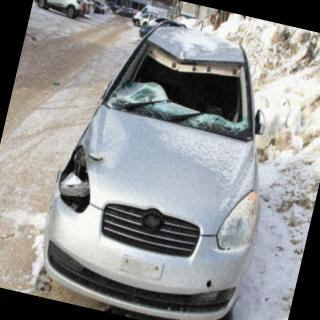

In [26]:
Image("/kaggle/working/car_segmentasi-1/train/images/1161_jpg.rf.3dcb7836dd384104922f0fcb75d68036.jpg")

coba test prediksi dengan sebuah gambar

In [27]:
# results = model.predict(source='/kaggle/input/bumper-dent-test/120.jpg', conf=0.25)
coba =  model.predict(source='/kaggle/working/car_segmentasi-1/train/images/162_jpg.rf.ce310d6d44a7418ee2a27564737c56fd.jpg', save=True, imgsz=320, conf=0.2)


image 1/1 /kaggle/working/car_segmentasi-1/train/images/162_jpg.rf.ce310d6d44a7418ee2a27564737c56fd.jpg: 320x320 1 bumper, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 4.5ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/segment/train23


Untuk mendapatkan kelas dan id kelas yang terdeteksi di dalam gambar

In [28]:
kelas_prediksi = []
id_prediksi = []
names = model.names
for r in coba:
    for c in r.boxes.cls:
        kelas_prediksi.append(names[int(c)])
        id_prediksi.append(int(c)+1)
        print(f"id {int(c)+1} -> kelas : {names[int(c)]}")

id 1 -> kelas : bumper


In [29]:
kelas_prediksi

['bumper']

menampilkan segmentasi hasil prediksi

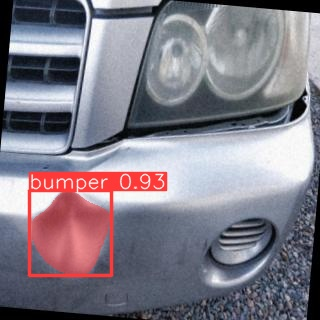

In [30]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{coba[0].save_dir}/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

koordinat segmentasi

In [31]:
coba[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')

menghitung luas area segmentasi, luas ini digunakan sebagai fitur/kolom pada dataset regresi untuk estimasi harga

In [32]:
import numpy as np




# Move the tensor to CPU memory before conversion
mask_cpu = coba[0].masks.data.cpu()

# Now you can safely convert to a NumPy array
mask_array = np.asarray(mask_cpu)

# Calculate mask areas using the mask_array
mask_areas = []
for mask in mask_array:
    mask_area = np.sum(mask == 1)
    mask_areas.append(mask_area)
    
# Access individual mask areas as needed
for i in range(len(mask_areas)):
    print(f"Luas segmentasi kelas {kelas_prediksi[i]} : ", mask_areas[i])


Luas segmentasi kelas bumper :  4720


membuat dataset berdasarkan dataset yang telah di anotasi pada bentuk coco json,convert ke csv

In [33]:
import json
import csv

# Open the COCO annotations JSON file
with open('/kaggle/input/anotasi/_annotations.coco.json', 'r') as f:
    data = json.load(f)

# Initialize an empty list to store category IDs and areas
category_id_areas = []

# Extract data from annotations
annotations = data['annotations']

for annotation in annotations:
    # Get category ID and area
    category_id = annotation['category_id']
    area = annotation['area']

    # Append data to the list
    category_id_areas.append([category_id, area])

# Create CSV header
csv_header = ['category_id', 'area']

# Open a CSV file for writing
with open('data_harga_car_damage.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(csv_header)

    # Write each category ID and area row
    writer.writerows(category_id_areas)

print("CSV file created successfully!")


CSV file created successfully!


In [34]:
import pandas as pd

data_car = pd.read_csv('/kaggle/working/data_harga_car_damage.csv')
data_car.head(10)

category_id       area
0            2  50458.601
1            2   4314.628
2            3   4476.774
3            1  24484.502
4            1   9806.823
5            3  48697.932
6            2  26719.216
7            3   8035.054
8            3   4619.022
9            1   6472.020

In [35]:
data_car.shape

(83, 2)

buat dummy data untuk harga

In [36]:
import numpy as np
import csv

# Define the mean and standard deviation for the normal distribution
mean = 500000  # Adjust this value for the desired mean price
std_dev = 30000  # Adjust this value for the desired standard deviation

# Generate 83 random values using numpy.random.normal()
random_values = np.random.normal(mean, std_dev, size=83)
print(random_values)

[ 5.5292e+05    5.12e+05  5.2936e+05  5.6723e+05  5.5603e+05  4.7068e+05   5.285e+05  4.9546e+05   4.969e+05  5.1232e+05  5.0432e+05  5.4363e+05  5.2283e+05  5.0365e+05  5.1332e+05  5.1001e+05  5.4482e+05  4.9385e+05  5.0939e+05  4.7438e+05  4.2341e+05  5.1961e+05  5.2593e+05  4.7774e+05  5.6809e+05  4.5637e+05
  5.0137e+05  4.9438e+05  5.4598e+05  5.4408e+05  5.0465e+05  5.1134e+05  4.7337e+05  4.4058e+05  4.8956e+05  5.0469e+05  5.3691e+05  5.3607e+05  4.8838e+05  4.9093e+05  4.6854e+05   4.574e+05  4.4881e+05  5.5852e+05  4.8471e+05  4.8686e+05  4.6242e+05  5.2332e+05  4.5158e+05  4.9362e+05  4.7314e+05  5.1161e+05
  4.8468e+05  4.6458e+05  4.9915e+05  5.1285e+05    5.02e+05  5.0907e+05  4.8097e+05  4.8912e+05  4.7983e+05  4.8921e+05  4.7561e+05  4.4821e+05  5.0532e+05  4.8795e+05  4.5109e+05  5.1388e+05  4.7278e+05  5.0156e+05  5.2187e+05  5.0387e+05  5.3418e+05  4.6296e+05  5.1207e+05  4.7946e+05  4.7388e+05  4.8263e+05
  4.9065e+05  5.0168e+05  4.6505e+05  5.2702e+05  5.1397e+05]

In [37]:
data_car['harga'] = random_values

dataset untuk regresi

In [38]:
data_car.head(10)

category_id       area          harga
0            2  50458.601  552921.570379
1            2   4314.628  512004.716251
2            3   4476.774  529362.139523
3            1  24484.502  567226.795976
4            1   9806.823  556026.739704
5            3  48697.932  470681.663604
6            2  26719.216  528502.652526
7            3   8035.054  495459.283751
8            3   4619.022  496903.434446
9            1   6472.020  512317.955058

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = data_car.drop(['harga'], axis=1)
y = data_car['harga']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123) 

In [40]:
print("data train : ", x_train.shape)
print("data train : ", y_train.shape)

data train :  (66, 2)
data train :  (66,)


In [41]:
random_forest = RandomForestRegressor()

In [42]:
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
random_forest.score(x_test, y_test)

-1.616455637769186

hasil estimasi harga

In [44]:
prediksi_harga = random_forest.predict([[id_prediksi[0], mask_areas[0]]])
print(f'harga_prediksi rusak {kelas_prediksi} : ', prediksi_harga)

harga_prediksi rusak ['bumper'] :  [ 4.8662e+05]


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
